In [16]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [17]:
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [12,10,8,6,4,2]]).T
datos.columns = ["x1", "x2"]

In [18]:
datos

x1  x2
0   2  12
1   4  10
2   6   8
3   8   6
4  10   4
5  12   2

<Axes: xlabel='x1', ylabel='x2'>

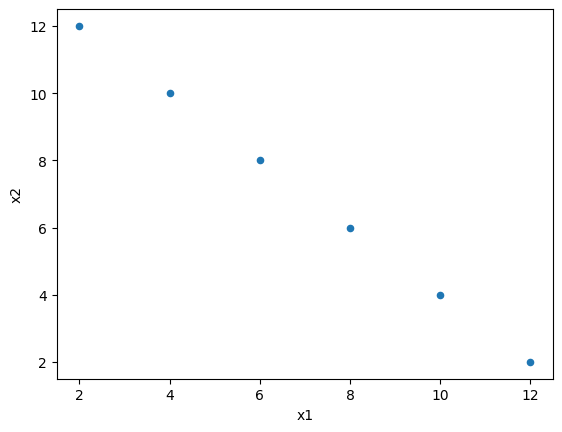

In [19]:
datos.plot.scatter("x1", y="x2")

In [20]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [21]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [22]:
pca.explained_variance_ratio_

array([1.])

In [23]:
pd.DataFrame(
    data    = pca.components_,
    columns = datos.columns,
    index   = ['PC1']
)

x1        x2
PC1 -0.707107  0.707107

In [24]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

PC1
0  2.070197
1  1.242118
2  0.414039
3 -0.414039
4 -1.242118
5 -2.070197

In [25]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

0        1
0 -1.46385  1.46385
1 -0.87831  0.87831
2 -0.29277  0.29277
3  0.29277 -0.29277
4  0.87831 -0.87831
5  1.46385 -1.46385

In [26]:
std.inverse_transform(reconstruccion)

array([[ 2., 12.],
       [ 4., 10.],
       [ 6.,  8.],
       [ 8.,  6.],
       [10.,  4.],
       [12.,  2.]])

In [27]:
# Repetir
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [12*1.01,10*1.02,8*1.03,6*1.04,4*1.05,2*1.06]]).T
datos.columns = ["x1", "x2"]

In [28]:
datos

x1     x2
0   2.0  12.12
1   4.0  10.20
2   6.0   8.24
3   8.0   6.24
4  10.0   4.20
5  12.0   2.12

In [29]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [31]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1)

In [32]:
pca.explained_variance_

array([2.39987202])

In [33]:
pd.DataFrame(
    data= pca.components_,
    columns=datos.columns,
    index= ['PC1']
)

x1        x2
PC1  0.707107 -0.707107

In [34]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

PC1
0 -2.056286
1 -1.244812
2 -0.425057
3  0.402977
4  1.239292
5  2.083886

In [35]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

0         1
0 -1.454014  1.454014
1 -0.880215  0.880215
2 -0.300561  0.300561
3  0.284948 -0.284948
4  0.876312 -0.876312
5  1.473530 -1.473530